In [1]:
from __future__ import division
import os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits
import json
from scipy.stats import lognorm, norm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
modName      = 'grbm+blackb'
version      = '-01-'
det          = 'G'
detector     = 'GBM'
burst        = 'bn080916009'

In [3]:
data_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modName)

In [4]:
filename = os.path.join(mod_dir, "fakeit_fitresults_%s_%s_%s_.fit"%(modName, version, det))

if os.path.exists(filename):
    pass
else:
    raise Exception, "File does not exist."

In [6]:
f          = pyfits.open(filename)
all_quantiles = OrderedDict()
for par in f[1].data.columns.names:
    if 'PARAM' in par:
        data = f[1].data[par]
        quantiles = np.percentile(data, [15.865, 84.135])
        print quantiles
        all_quantiles[par] = quantiles

[-1.27014426 -1.19991588]
[-3.01235731 -2.26829117]
[ 1087.02081133  1879.5351614 ]
[ 0.01155027  0.01300093]
[ 39.84313338  44.41853305]
[  3.47813512e-06   5.39295089e-06]


In [7]:
#f          = pyfits.open(filename)

data1      = pd.DataFrame()
for n,name in enumerate(f[1].data.columns.names):
    if 'PARAM' in name:
        data1[name]   = f[1].data[name]

data   = data1.astype('float64')

In [41]:
def do_plotting(d, off, mirr):    
    plt.figure(figsize=(8, 6))    
    count, bins, ignored = plt.hist(d, bins = 200, normed=True, 
                                    color='grey', align='mid', 
                                    histtype='stepfilled',
                                    alpha=0.5)
    yAxUp = count.max()

    pars,errs = None,None
    dist    = lognorm
    pars    = dist.fit(d)
    errs    = dist.ppf([0.15865, 0.84135], *pars)     
    x       = np.linspace(d.min(), d.max(), 1000)
    y       = dist.pdf(x, *pars)
    plt.plot(x, y, linestyle='-', color='black', lw=1, label='Lognorm')
    print('pars: ', pars)    
    print('errs: ', list((errs*mirr)+off))
    
    pars,errs = None,None
    pars    = dist.fit(d, loc=0, scale=1)
    errs    = dist.ppf([0.15865, 0.84135], *pars)     
    x       = np.linspace(d.min(), d.max(), 1000)
    y       = dist.pdf(x, *pars)
    plt.plot(x, y, linestyle='--', color='red', lw=1, label='Lognorm floc=0')
    print('pars: ', pars)    
    print('errs: ', list((errs*mirr)+off))
    
    pars,errs = None,None
    dist    = norm
    pars    = dist.fit(d)
    errs    = dist.ppf([0.15865, 0.84135], *pars)     
    x       = np.linspace(d.min(), d.max(), 1000)
    y       = dist.pdf(x, *pars)
    plt.plot(x, y, linestyle='-.', color='blue', lw=1, label='Normal')
    print('pars: ', pars)    
    print('errs: ', list((errs*mirr)+off))

    #XLims = [d.min(), d.max()]
    XLims = [0, 4000]
    YLims = [0, yAxUp*1.2]
    plt.xlim(*XLims)
    plt.ylim(*YLims)
    plt.legend(loc='best', fontsize=10)
    plt.title("Offset = %f"%off, fontsize=16)
    plt.show()
    #return pars, errs

In [26]:
#dat = np.log10(data[param])

In [27]:
#dat.min()

In [40]:
data[param].min(), data[param].max()

(546.87536189991545, 4007.4546440581771)

In [38]:
offset

-153.12463810008455

('pars: ', (5.7178029133673114, 546.87536189991533, 5.708927121772934))
('errs: ', [546.89412438354611, 2283.9507684966738])
('pars: ', (0.33641572048849755, 247.98929449555473, 1169.4238142637248))
('errs: ', [1083.3331264222625, 1885.1020678225343])
('pars: ', (1485.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


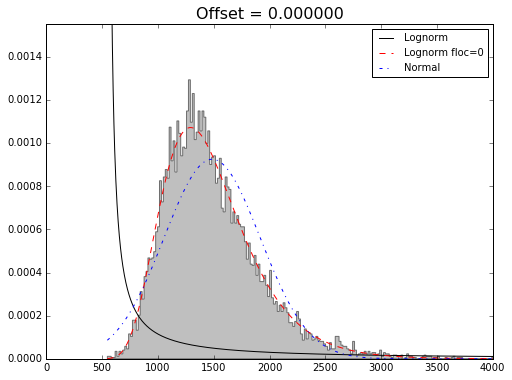

In [42]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    =0 #= dat.min()-700.
dat       = dat - offset

do_plotting(dat, offset, mirror)

('pars: ', (4.6452765094056581, 399.99999999479405, 12.219491441753338))
('errs: ', [546.9927411559288, 1818.9567291148587])
('pars: ', (0.30834487048182957, -0.83055365929068414, 1276.7613964924908))
('errs: ', [1084.0264958284652, 1883.9461821635537])
('pars: ', (1338.8263907728472, 430.81992219143592))
('errs: ', [1054.8724759492015, 1916.5310293963234])


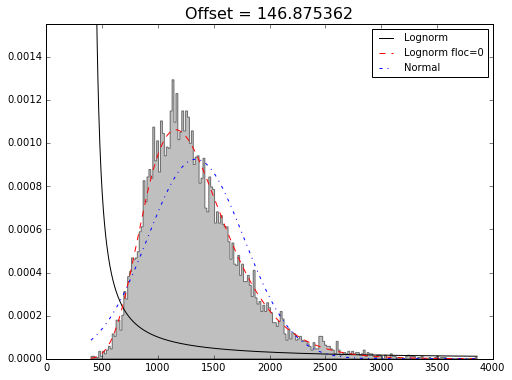

In [43]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = dat.min()-400.
dat       = dat - offset

do_plotting(dat, offset, mirror)

### Shifted to origin.

# offset 546

('pars: ', (0.33641572305205891, -298.88608299866615, 1169.4238434193917))
('errs: ', [1083.3331295129565, 1885.1020972410843])
('pars: ', (0.33641571783983665, -298.88610930579244, 1169.4238565124456))
('errs: ', [1083.3331169125645, 1885.1020807301497])
('pars: ', (938.8263907728475, 430.81992219143598))
('errs: ', [1054.872475949202, 1916.5310293963239])


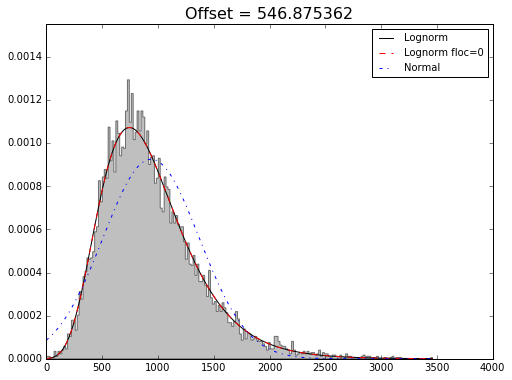

In [44]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = dat.min()
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 296

('pars: ', (5.8338572576435812, 249.99999999999997, 2.3713249299010584))
('errs: ', [546.88230133374202, 1357.1982302640122])
('pars: ', (0.33641569432050517, -48.886124286431254, 1169.42389978963))
('errs: ', [1083.3331524928781, 1885.1020878299514])
('pars: ', (1188.8263907728472, 430.81992219143598))
('errs: ', [1054.8724759492015, 1916.5310293963234])


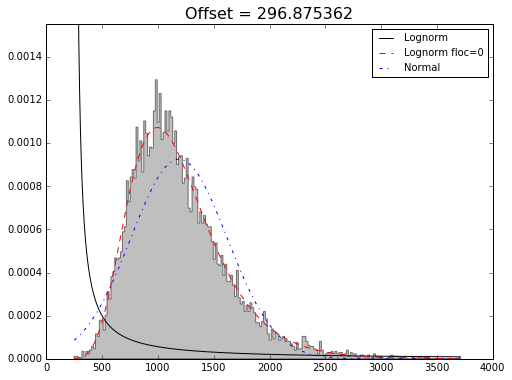

In [45]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = dat.min()-250.
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 336

('pars: ', (0.33641569931881965, -88.886142752333427, 1169.4239024023955))
('errs: ', [1083.3331317179268, 1885.1020812047232])
('pars: ', (0.36427068891133518, -5.5346171324194344, 1080.7933353130461))
('errs: ', [1082.1653091210505, 1887.1159406187699])
('pars: ', (1148.8263907728472, 430.81992219143598))
('errs: ', [1054.8724759492015, 1916.5310293963234])


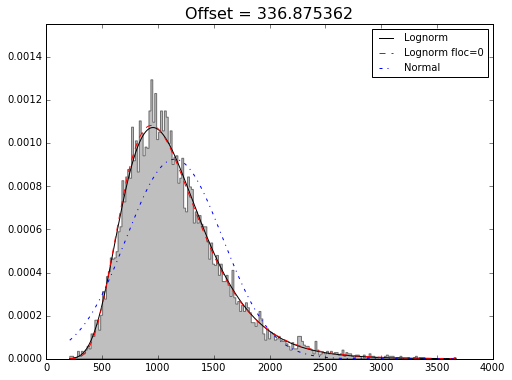

In [46]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = dat.min()-210.
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 331.87

('pars: ', (4.4959159811729661, 214.99999999214396, 4.7459331079376899))
('errs: ', [546.92829503906216, 972.39098566289556])
('pars: ', (0.33641571427461364, -83.88612120725, 1169.4238649483336))
('errs: ', [1083.3331140152895, 1885.1020748015553])
('pars: ', (1153.8263907728472, 430.81992219143598))
('errs: ', [1054.8724759492015, 1916.5310293963234])


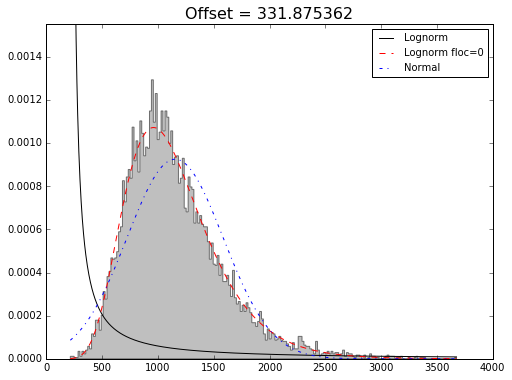

In [48]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = dat.min()-215.
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 341

('pars: ', (0.3364157189063724, -93.010727363302834, 1169.4238376993001))
('errs: ', [1083.3331226255725, 1885.1020761816937])
('pars: ', (0.33641571452588948, -93.010757589040495, 1169.423868285242))
('errs: ', [1083.3331179073004, 1885.1020816026671])
('pars: ', (1144.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


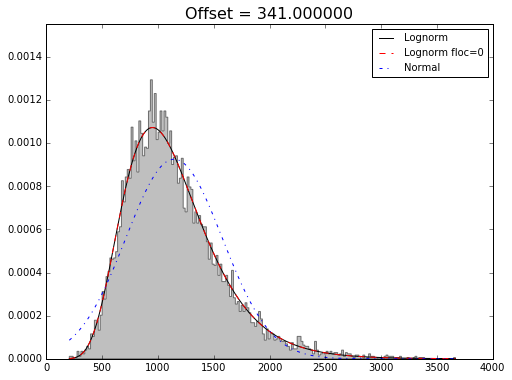

In [76]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = 341
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 342

('pars: ', (7.9259830349996641, 204.87536189991542, 13.229944710449285))
('errs: ', [546.88014019087905, 37177.427661126625])
('pars: ', (0.33641570975887675, -94.010767509988682, 1169.4238949889245))
('errs: ', [1083.3331310435315, 1885.1021012607273])
('pars: ', (1143.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


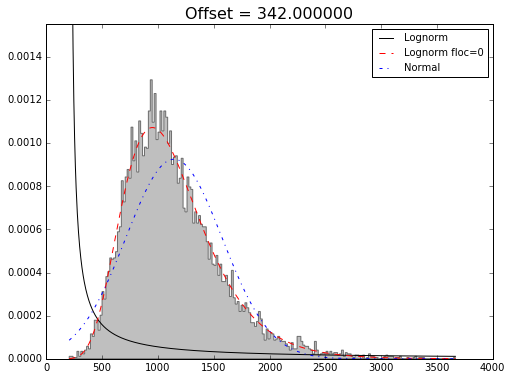

In [75]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
offset    = 342
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 343

('pars: ', (6.2683272586684957, 203.87536189991542, 1.579514357075511))
('errs: ', [546.87835529835843, 1380.3312655352495])
('pars: ', (0.33641570868025611, -95.010752469614559, 1169.4238711747059))
('errs: ', [1083.3331299739509, 1885.1020811969743])
('pars: ', (1142.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


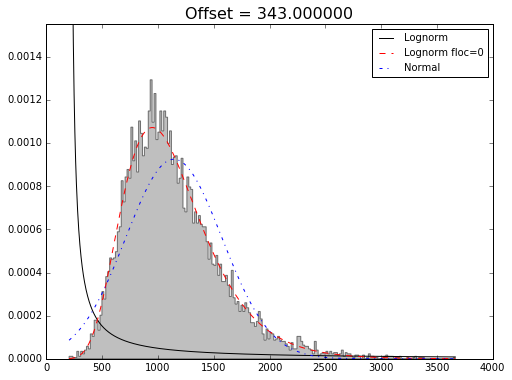

In [72]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 343.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 344

('pars: ', (0.33641572383738361, -96.010678805688229, 1169.4237901668157))
('errs: ', [1083.3331331105626, 1885.1020662699018])
('pars: ', (0.33641571706941364, -96.010727623177218, 1169.423845538359))
('errs: ', [1083.333129499827, 1885.1020838885877])
('pars: ', (1141.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


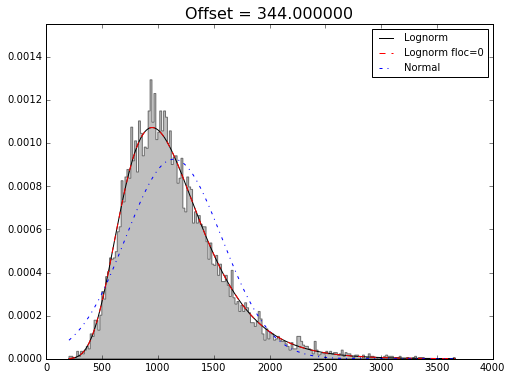

In [71]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 344.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset = 345

('pars: ', (6.2704156270525289, 201.87536189991542, 1.566310320443062))
('errs: ', [546.87832408215411, 1375.0917990508133])
('pars: ', (0.33641568431695096, -97.010828349588664, 1169.4239496849632))
('errs: ', [1083.3331305276738, 1885.1020753396024])
('pars: ', (1140.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


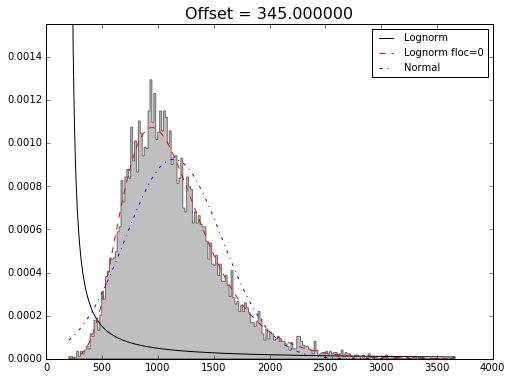

In [69]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 345.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 346

('pars: ', (0.33054138105351577, -103.88806117621101, 1175.4579030600657))
('errs: ', [1086.7130829956816, 1878.0335704728745])
('pars: ', (0.33641575023269582, -98.010634756900856, 1169.4237464261164))
('errs: ', [1083.3331238648175, 1885.1020922977627])
('pars: ', (1139.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


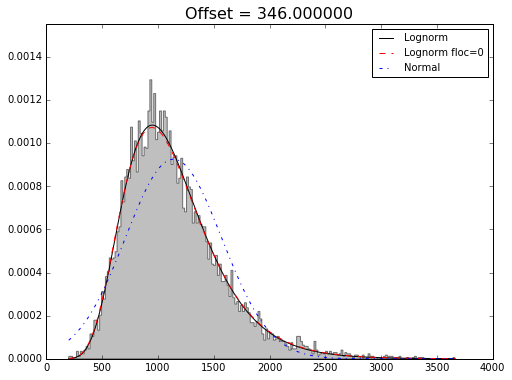

In [67]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 346.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

# offset 347

('pars: ', (0.33641572741596193, -99.010665953840942, 1169.4237853578347))
('errs: ', [1083.3331395378461, 1885.1020782481703])
('pars: ', (0.33641571250644586, -99.010768325984756, 1169.4238968336197))
('errs: ', [1083.3331292500247, 1885.1021075253554])
('pars: ', (1138.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


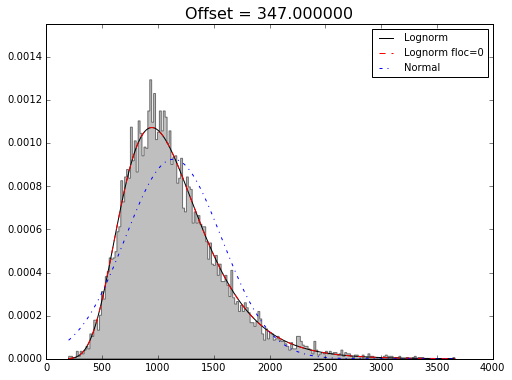

In [68]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 347.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

### 546.87-205 = 341.87

## An offset around 341.87 is where it starts to mess up.

### (data[param].max() - data[param].min())/10. = 346.05792821582617

## range/10.

('pars: ', (0.33641568727817706, -100.01078950412634, 1169.4239201700093))
('errs: ', [1083.333145816292, 1885.1020777141307])
('pars: ', (0.33641569869475785, -100.01078087499494, 1169.4239185172414))
('errs: ', [1083.3331437278382, 1885.102102720138])
('pars: ', (1137.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


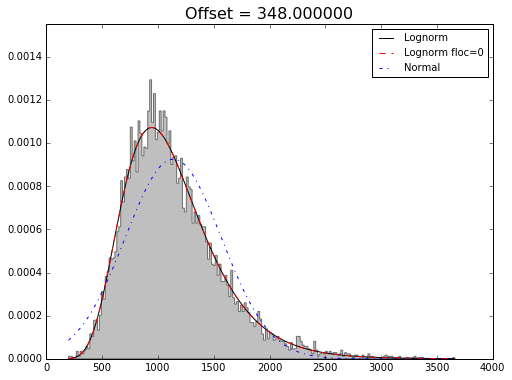

In [78]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 348.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

('pars: ', (0.33641570453574865, -101.01077843153516, 1169.4239077340494))
('errs: ', [1083.3331335892967, 1885.1020996304414])
('pars: ', (0.33641573452906154, -101.01067306637262, 1169.423785357465))
('errs: ', [1083.3331264830376, 1885.10208278032])
('pars: ', (1136.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


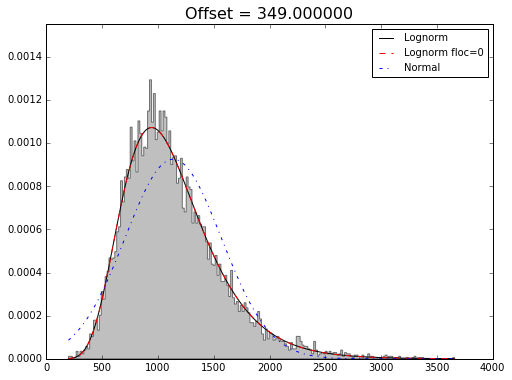

In [79]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 349.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

('pars: ', (0.33641568548232526, -102.01083085228063, 1169.4239441799641))
('errs: ', [1083.3331231191364, 1885.1020670381818])
('pars: ', (0.33641570264315129, -102.01077701989243, 1169.4238959181093))
('errs: ', [1083.3331281415708, 1885.1020814021194])
('pars: ', (1135.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


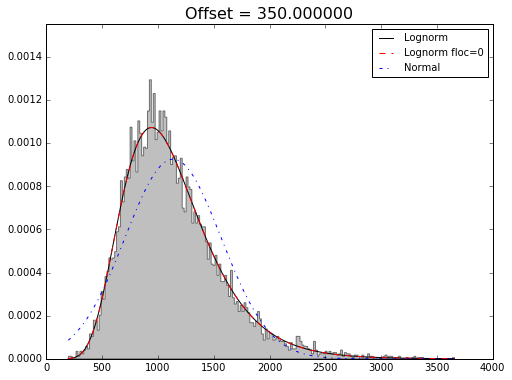

In [80]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 350.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

('pars: ', (6.2784593609923558, 195.87536189991542, 1.5772648859575429))
('errs: ', [546.87832090133725, 1387.6199800503443])
('pars: ', (0.33641570758292971, -103.01075271912343, 1169.4238853930983))
('errs: ', [1083.3331407976013, 1885.1020990557486])
('pars: ', (1134.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


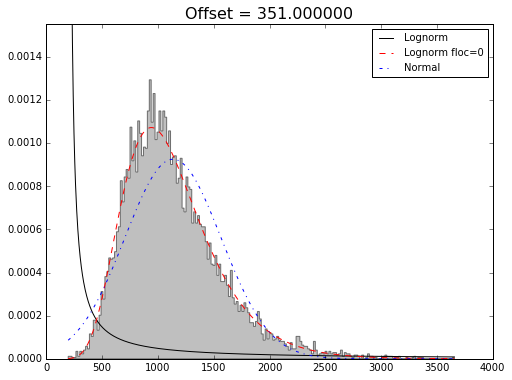

In [81]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 351.0
dat       = dat - offset

do_plotting(dat, offset, mirror)

('pars: ', (6.2368215708262404, 194.87536189991542, 1.5835771922478981))
('errs: ', [546.87845905699533, 1356.5587777386186])
('pars: ', (0.33641570872830306, -104.01077453653244, 1169.4239117593759))
('errs: ', [1083.3331368573733, 1885.1021160244577])
('pars: ', (1133.7017526727627, 430.81992219143592))
('errs: ', [1054.8724759492018, 1916.5310293963237])


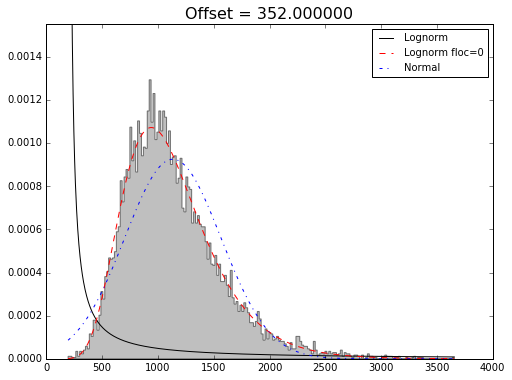

In [82]:
param     = 'PARAM3'
mirror    = 1

dat       = None
dat       = (data[param]*(mirror))
#offset    = dat.min()-205.
offset    = 352.0
dat       = dat - offset

do_plotting(dat, offset, mirror)